In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("GenZ_DatingApp_Data.csv")

In [3]:
data.head()

User_ID  Age      Gender   Location      Education     Occupation  \
0        1   20  Non-binary  Bangalore  Undergraduate     Freelancer   
1        2   24      Female      Delhi  Undergraduate  Part-time Job   
2        3   24  Non-binary    Kolkata  Undergraduate         Intern   
3        4   22  Non-binary      Delhi       Graduate  Full-time Job   
4        5   18        Male      Delhi       Graduate         Intern   

  Primary_App Secondary_Apps Usage_Frequency Daily_Usage_Time  \
0       Hinge          Hinge         Monthly           1 hour   
1       Hinge        OkCupid          Weekly       30 minutes   
2         NaN            NaN          Weekly          2 hours   
3         NaN        OkCupid           Daily       30 minutes   
4     OkCupid        OkCupid          Weekly          2 hours   

    Reason_for_Using  Satisfaction       Challenges    Desired_Features  \
0  Finding a Partner             4  Safety Concerns         Audio Calls   
1      Casual Dating             5     Time-Wasting         Video Calls   
2      Casual Dating             4  Safety Concerns   Detailed Profiles   
3         Casual Fun             3              NaN  AI Recommendations   
4         Casual Fun             4  Safety Concerns         Video Calls   

  Preferred_Communication                    Partner_Priorities  
0             Video Calls     Values > Personality > Appearance  
1                    Text     Values > Personality > Appearance  
2                    Text     Values > Personality > Appearance  
3             Voice Notes      Personality > Interests > Values  
4                    Text  Appearance > Interests > Personality

In [4]:
data.shape

(500, 16)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication  500 non-null    o

In [6]:
data[["Gender","Education"]]

Gender      Education
0    Non-binary  Undergraduate
1        Female  Undergraduate
2    Non-binary  Undergraduate
3    Non-binary       Graduate
4          Male       Graduate
..          ...            ...
495      Female  Undergraduate
496        Male   Postgraduate
497        Male       Graduate
498      Female       Graduate
499        Male       Graduate

[500 rows x 2 columns]

In [7]:
data.iloc[6]

User_ID                                                   7
Age                                                      22
Gender                                           Non-binary
Location                                            Chennai
Education                                      Postgraduate
Occupation                                    Part-time Job
Primary_App                                          Tinder
Secondary_Apps                                       Tinder
Usage_Frequency                                     Monthly
Daily_Usage_Time                                 30 minutes
Reason_for_Using                          Finding a Partner
Satisfaction                                              4
Challenges                                     Time-Wasting
Desired_Features                                Audio Calls
Preferred_Communication                                Text
Partner_Priorities         Personality > Interests > Values
Name: 6, dtype: object

In [8]:
data.iloc[1:10,1:5]

Age      Gender Location      Education
1   24      Female    Delhi  Undergraduate
2   24  Non-binary  Kolkata  Undergraduate
3   22  Non-binary    Delhi       Graduate
4   18        Male    Delhi       Graduate
5   23      Female   Mumbai  Undergraduate
6   22  Non-binary  Chennai   Postgraduate
7   21      Female     Pune   Postgraduate
8   20        Male     Pune   Postgraduate
9   20  Non-binary  Chennai  Undergraduate

In [9]:
data["Age"].mean()

21.582

In [10]:
data["Age"].describe()

count    500.000000
mean      21.582000
std        2.259532
min       18.000000
25%       20.000000
50%       22.000000
75%       24.000000
max       25.000000
Name: Age, dtype: float64

In [11]:
(data.isnull().sum() / data.shape[0]) * 100


User_ID                     0.0
Age                         0.0
Gender                      0.0
Location                    0.0
Education                   0.0
Occupation                  0.0
Primary_App                21.4
Secondary_Apps             22.8
Usage_Frequency             0.0
Daily_Usage_Time            0.0
Reason_for_Using            0.0
Satisfaction                0.0
Challenges                 23.4
Desired_Features            0.0
Preferred_Communication     0.0
Partner_Priorities          0.0
dtype: float64

In [12]:
data["Gender"].value_counts()

#hello

Gender
Female        176
Male          171
Non-binary    153
Name: count, dtype: int64

In [13]:
genderPer= (data["Gender"].value_counts(normalize=True) * 100 )
for i in genderPer:
    print(i, "%")


35.199999999999996 %
34.2 %
30.599999999999998 %


In [14]:
data["Gender"] = data["Gender"].astype("category")

In [15]:
data["Preferred_Communication"] = data["Preferred_Communication"].astype("category")

In [16]:
data["Satisfaction"] = data["Satisfaction"].astype("category")

In [17]:
data["Secondary_Apps"] = data["Secondary_Apps"].astype("category")

In [18]:
data["Challenges"] = data["Challenges"].astype("category")

In [19]:
data["Reason_for_Using"] = data["Reason_for_Using"].astype("category")

In [20]:
#thanks for this lesson
data[data.select_dtypes(include="object").columns] = data.select_dtypes(include="object").astype("category")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              393 non-null    category
 7   Secondary_Apps           386 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    category
 12  Challenges               383 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [22]:
#fill in the missing values with Unknown for the string columns


categorical_columns = ["Primary_App", "Secondary_Apps","Challenges"]

for col in categorical_columns:
    # Check if the column's dtype is categorical
    if isinstance(data[col].dtype, pd.CategoricalDtype):
        # Only add "Unknown" if it is not already in the categories
        if "Unknown" not in data[col].cat.categories:
            data[col] = data[col].cat.add_categories("Unknown")
    # Fill missing values with "Unknown"
    data[col] = data[col].fillna("Unknown")



In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              500 non-null    category
 7   Secondary_Apps           500 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    category
 12  Challenges               500 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              500 non-null    category
 7   Secondary_Apps           500 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    category
 12  Challenges               500 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [25]:
data["Age"].describe()

count    500.000000
mean      21.582000
std        2.259532
min       18.000000
25%       20.000000
50%       22.000000
75%       24.000000
max       25.000000
Name: Age, dtype: float64

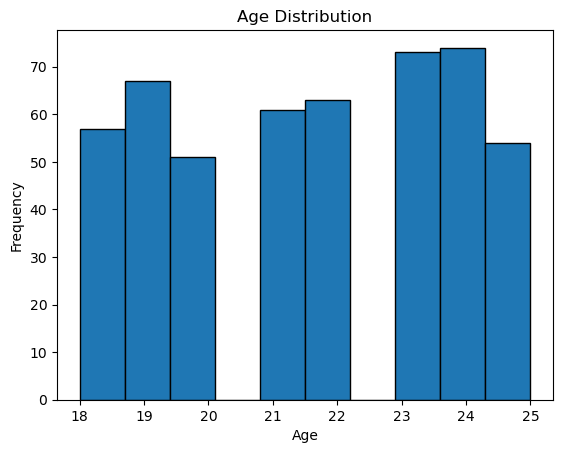

In [26]:


# Create a histogram with 10 bins and black edges for clarity
plt.hist(data["Age"], bins=10, edgecolor='black')

# Add titles and labels
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Display the histogram
plt.show()


In [27]:
data["Primary_App"].describe()

count         500
unique          5
top       OkCupid
freq          118
Name: Primary_App, dtype: object

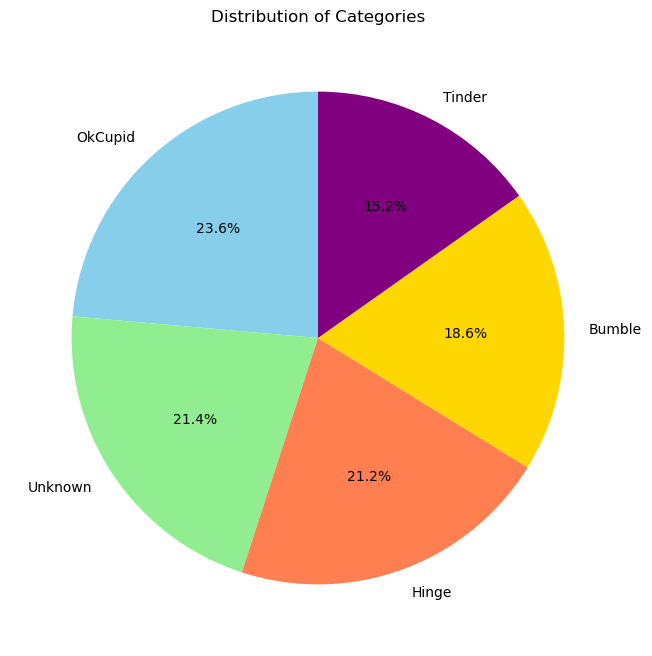

In [28]:

# Count unique values in the categorical column
category_counts = data["Primary_App"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral', 'gold','purple'])
plt.title("Distribution of Categories")
plt.show()

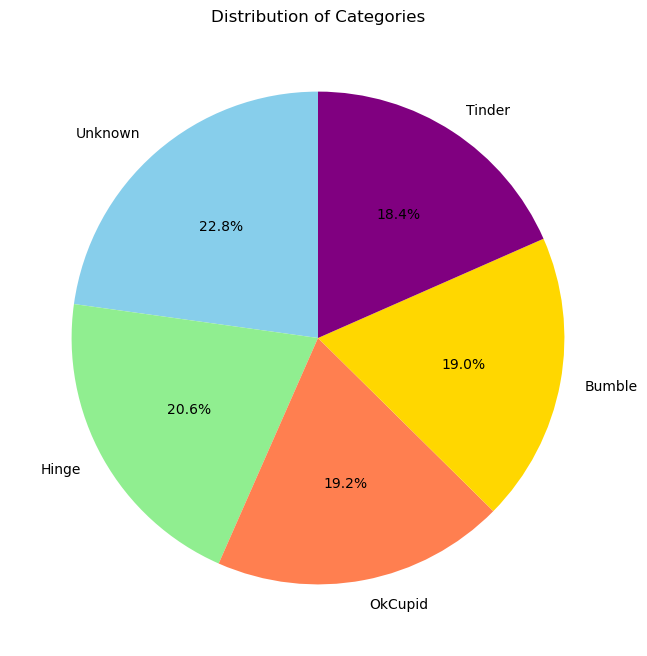

In [29]:
# Count unique values in the categorical column
category_counts = data["Secondary_Apps"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral', 'gold','purple'])
plt.title("Distribution of Categories")
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              500 non-null    category
 7   Secondary_Apps           500 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    category
 12  Challenges               500 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [31]:
data["Location"].describe()

count        500
unique         7
top       Mumbai
freq          82
Name: Location, dtype: object

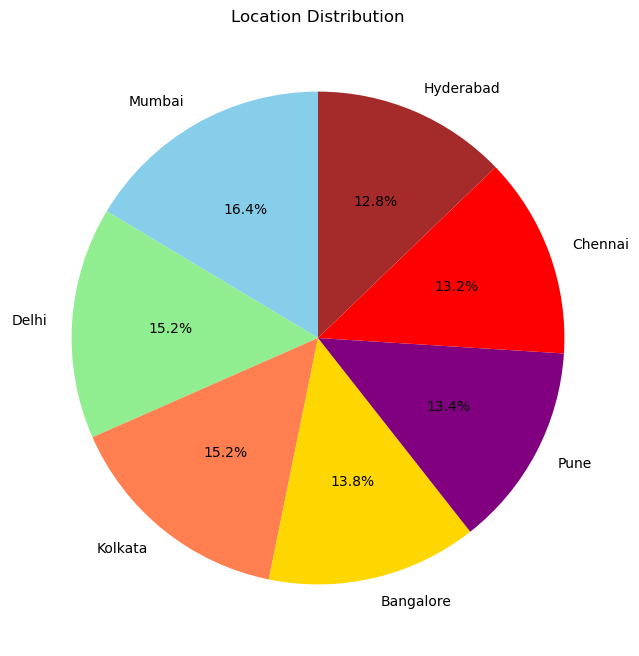

In [32]:
# Count unique values in the categorical column
category_counts = data["Location"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral', 'gold', 'purple', 'red','brown'])
plt.title("Location Distribution")
plt.show()

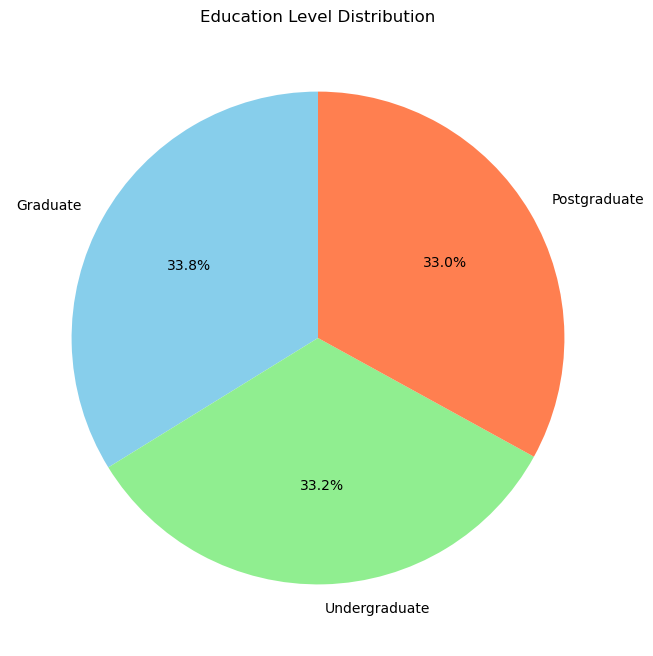

In [33]:
# Count occurrences of each education category
education_counts = data["Education"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral'])

# Title
plt.title("Education Level Distribution")

# Show plot
plt.show()


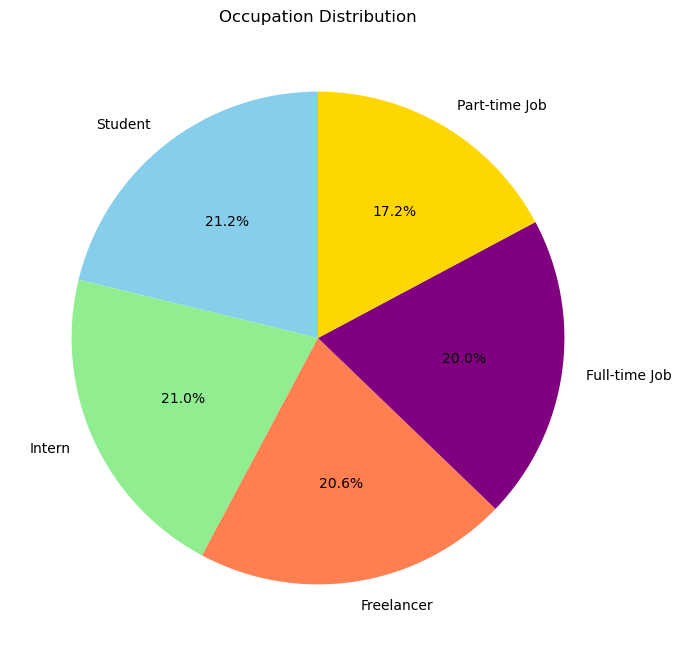

In [34]:
# Count occurrences of each education category
occupation_counts = data["Occupation"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral', 'purple', 'gold'])

# Title
plt.title("Occupation Distribution")

# Show plot
plt.show()


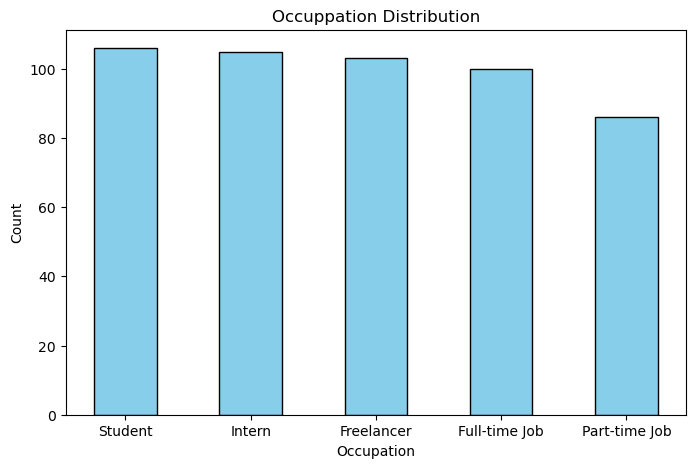

In [35]:
# Count occurrences of each category in the "Education" column
occupation_counts = data["Occupation"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(occupation_counts.index, occupation_counts.values, color="skyblue", width=0.5, edgecolor="black")

# Labels and title
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occuppation Distribution")

plt.show()

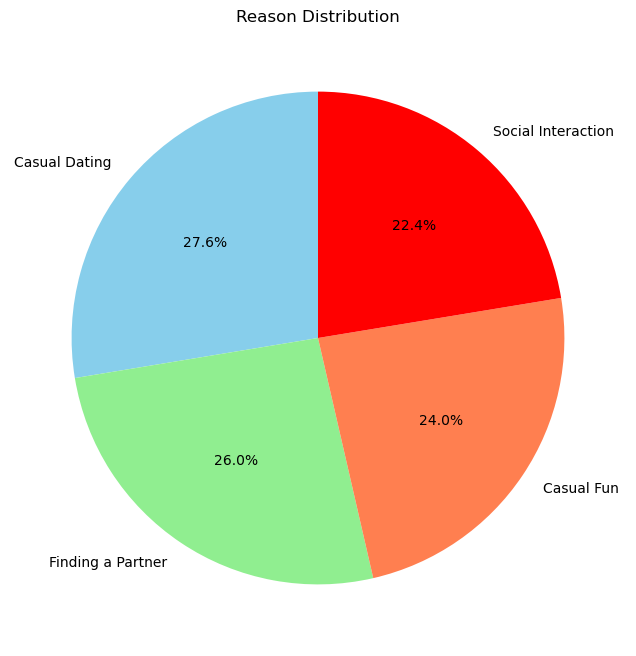

In [36]:
# Count occurrences of each education category
reason_counts = data["Reason_for_Using"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral', 'red'])

# Title
plt.title("Reason Distribution")

# Show plot
plt.show()

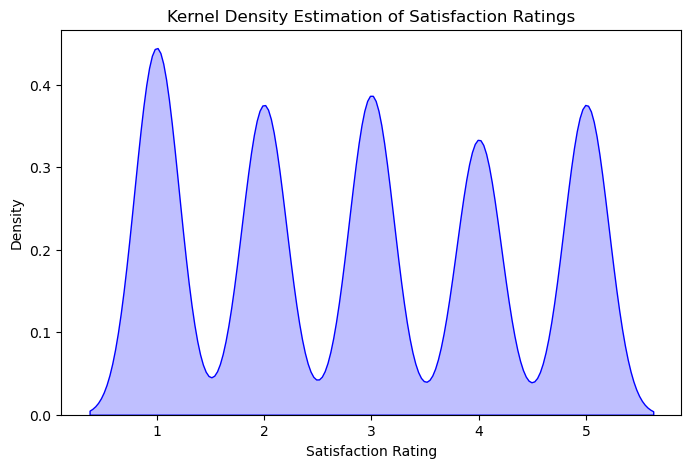

In [37]:
# Plot KDE for Satisfaction
plt.figure(figsize=(8, 5))
sns.kdeplot(data["Satisfaction"].astype(float), fill=True, color="blue", bw_adjust=0.5)

# Labels and title
plt.xlabel("Satisfaction Rating")
plt.ylabel("Density")
plt.title("Kernel Density Estimation of Satisfaction Ratings")
plt.xticks([1, 2, 3, 4, 5])  # Ensure only valid ratings appear

# Show plot
plt.show()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              500 non-null    category
 7   Secondary_Apps           500 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    category
 12  Challenges               500 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [39]:
data.head(5)

User_ID  Age      Gender   Location      Education     Occupation  \
0        1   20  Non-binary  Bangalore  Undergraduate     Freelancer   
1        2   24      Female      Delhi  Undergraduate  Part-time Job   
2        3   24  Non-binary    Kolkata  Undergraduate         Intern   
3        4   22  Non-binary      Delhi       Graduate  Full-time Job   
4        5   18        Male      Delhi       Graduate         Intern   

  Primary_App Secondary_Apps Usage_Frequency Daily_Usage_Time  \
0       Hinge          Hinge         Monthly           1 hour   
1       Hinge        OkCupid          Weekly       30 minutes   
2     Unknown        Unknown          Weekly          2 hours   
3     Unknown        OkCupid           Daily       30 minutes   
4     OkCupid        OkCupid          Weekly          2 hours   

    Reason_for_Using Satisfaction       Challenges    Desired_Features  \
0  Finding a Partner            4  Safety Concerns         Audio Calls   
1      Casual Dating            5     Time-Wasting         Video Calls   
2      Casual Dating            4  Safety Concerns   Detailed Profiles   
3         Casual Fun            3          Unknown  AI Recommendations   
4         Casual Fun            4  Safety Concerns         Video Calls   

  Preferred_Communication                    Partner_Priorities  
0             Video Calls     Values > Personality > Appearance  
1                    Text     Values > Personality > Appearance  
2                    Text     Values > Personality > Appearance  
3             Voice Notes      Personality > Interests > Values  
4                    Text  Appearance > Interests > Personality

In [40]:
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({"Daily_Usage_Time": ["2h 30m", "45m", "1h 15m", "3h", "90m", None]})

# Function to convert time strings to minutes
def convert_to_minutes(time_str):
    if pd.isna(time_str) or time_str.strip() == "":
        return None  # Handle NaN values
    
    time_str = time_str.lower()
    minutes = 0

    if "h" in time_str:
        hours_part = time_str.split("h")[0]
        minutes += int(hours_part) * 60
        time_str = time_str.split("h")[-1]  # Remaining part
    
    if "m" in time_str:
        minutes_part = time_str.replace("m", "").strip()
        if minutes_part:
            minutes += int(minutes_part)

    return minutes

# Apply the function
data["Daily_Usage_Minutes"] = data["Daily_Usage_Time"].apply(convert_to_minutes)

# Convert minutes to hours
data["Daily_Usage_Hours"] = data["Daily_Usage_Minutes"] / 60

print(data)


  Daily_Usage_Time  Daily_Usage_Minutes  Daily_Usage_Hours
0           2h 30m                150.0               2.50
1              45m                 45.0               0.75
2           1h 15m                 75.0               1.25
3               3h                180.0               3.00
4              90m                 90.0               1.50
5             None                  NaN                NaN


In [41]:
# Ensure Daily_Usage_Time is treated as a string
data["Daily_Usage_Time"] = data["Daily_Usage_Time"].astype(str)

# Reapply the conversion function
data["Daily_Usage_Minutes"] = data["Daily_Usage_Time"].apply(convert_to_minutes)

# Create a column for hours (handling potential NaN values safely)
data["Daily_Usage_Hours"] = data["Daily_Usage_Minutes"] / 60

# Display sample output
data[["Daily_Usage_Time", "Daily_Usage_Minutes", "Daily_Usage_Hours"]].head()


Daily_Usage_Time  Daily_Usage_Minutes  Daily_Usage_Hours
0           2h 30m                  150               2.50
1              45m                   45               0.75
2           1h 15m                   75               1.25
3               3h                  180               3.00
4              90m                   90               1.50

In [42]:
!echo "# Dataset Documentation" > README.md
with open("README.md", "w") as f:
    f.write("# Dataset Documentation\n\n")
    f.write("This dataset contains details about daily app usage times.\n")


In [43]:
echo "# Dataset Documentation" > README.md
echo "## Overview" >> README.md
echo "A dataset contains information on user app usage, including demographics, app preferences, and engagement levels." >> README.md
echo "## Columns & Descriptions" >> README.md
echo "| Column Name | Data Type | Description |" >> README.md
echo "|-------------|----------|-------------&*(|" >> README.md
echo "| User_ID | int64 | Unique identifier for each user |" >> README.md
echo "| Age | int64 | Age of the user |" >> README.md
echo "| Gender | category | Gender of the user (Male/Female) |" >> README.md


SyntaxError: invalid syntax (739733205.py, line 1)

In [44]:
with open("README.md", "w") as f:
    f.write("# Dataset Documentation\n\n")
    f.write("## Overview\n")
    f.write("This dataset contains details about daily app usage times, user demographics, and behavioral insights.\n\n")
    f.write("## Column Descriptions\n")
    f.write("- **User_ID**: Unique identifier for each user.\n")
    f.write("- **Daily_Usage_Time**: Recorded app usage in hours and minutes.\n\n")
    f.write("## Data Cleaning Steps\n")
    f.write("1. Removed duplicate entries.\n")
    f.write("2. Handled missing values.\n")
    f.write("3. Standardized categorical data.\n\n")
    f.write("## Usage\n")
    f.write("This dataset is intended for exploratory data analysis (EDA) and machine learning model training.\n")



In [45]:
import pandas as pd

# Assuming 'data' is your DataFrame
data_dict = pd.DataFrame({
    "Column Name": data.columns,
    "Data Type": [str(data[col].dtype) for col in data.columns],
    "Description": ["Description for " + col for col in data.columns]  # Replace with actual descriptions
})

data_dict.to_csv("data_dictionary.md", index=False, sep="|")


In [46]:
cleaning_steps = """
# Data Cleaning Documentation

## Steps Taken
- Removed duplicate records
- Filled missing values using mode for categorical features
- Standardized category labels
- Converted 'Daily_Usage_Time' into minutes and hours
"""
with open("cleaning_steps.md", "w") as file:
    file.write(cleaning_steps)


In [47]:
git add README.md data_dictionary.md cleaning_steps.md
git commit -m "Some much deserved support"
git push origin main


SyntaxError: invalid syntax (1625822941.py, line 1)

In [48]:
git config --global core.autocrlf true


SyntaxError: invalid syntax (1548159263.py, line 1)

In [49]:
cleaning_steps = """
# Data Cleaning Documentation

## Steps Taken
- Removed duplicate records
- Filled missing values using mode for categorical features
- Standardized category labels
- Converted 'Daily_Usage_Time' into minutes and hours
"""
with open("cleaning_steps.md", "w") as file:
    file.write(cleaning_steps)


In [50]:
!git commit -m "thanks for the enjoyment of life"
git push origin main


SyntaxError: invalid syntax (3311873327.py, line 2)

   User_ID  Age      Gender   Location      Education     Occupation  \
0        1   20  Non-binary  Bangalore  Undergraduate     Freelancer   
1        2   24      Female      Delhi  Undergraduate  Part-time Job   
2        3   24  Non-binary    Kolkata  Undergraduate         Intern   
3        4   22  Non-binary      Delhi       Graduate  Full-time Job   
4        5   18        Male      Delhi       Graduate         Intern   

  Primary_App Secondary_Apps Usage_Frequency Daily_Usage_Time  \
0       Hinge          Hinge         Monthly           1 hour   
1       Hinge        OkCupid          Weekly       30 minutes   
2         NaN            NaN          Weekly          2 hours   
3         NaN        OkCupid           Daily       30 minutes   
4     OkCupid        OkCupid          Weekly          2 hours   

    Reason_for_Using  Satisfaction       Challenges    Desired_Features  \
0  Finding a Partner             4  Safety Concerns         Audio Calls   
1      Casual Dating      

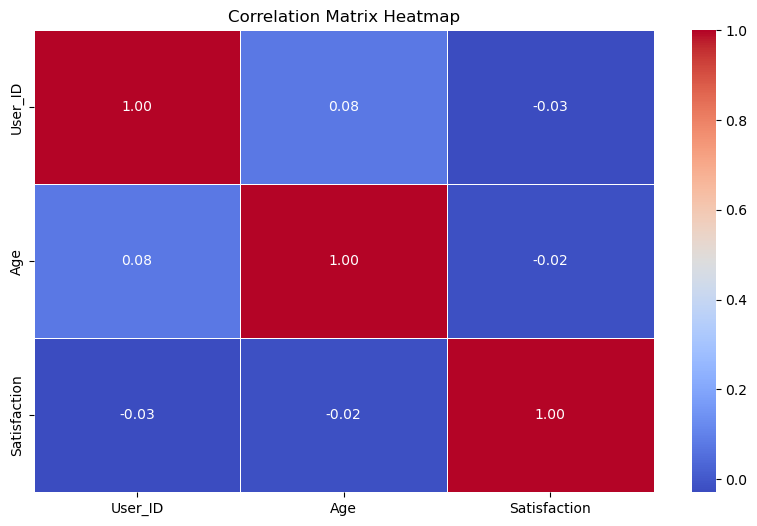

In [51]:
#Correlation Matrix & Heatmap
# To dentify relationships between numerical variables, like age and time spent on dating apps.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("GenZ_DatingApp_Data.csv")

# Check the first few rows to confirm it's loaded correctly
print(data.head())

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)  # Ensures only numeric columns are used

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [52]:
bins = [18, 25, 35, 45, 55, 65, 100]  # Define age ranges
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
data["Age_Group"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)


In [53]:
import pandas as pd

# Function to convert time strings to minutes
def convert_to_minutes(time_str):
    if isinstance(time_str, str):  # Ensure it's a string before processing
        if "hour" in time_str:
            hours = float(time_str.split(" ")[0])  # Extract hours
            return hours * 60
        elif "minute" in time_str:
            return float(time_str.split(" ")[0])  # Extract minutes
    return None  # Handle unexpected cases

# Convert 'Daily_Usage_Time' to numeric format (minutes)
data["Daily_Usage_Time"] = data["Daily_Usage_Time"].astype(str).apply(convert_to_minutes)
data["Daily_Usage_Time"] = pd.to_numeric(data["Daily_Usage_Time"], errors="coerce")

# Pivot Tables & Groupby Aggregations:
# These help summarize key statistics by groups, like dating app usage by gender.

# Pivot table for dating app usage by gender
pivot_table = data.pivot_table(index="Gender", values="Daily_Usage_Time", aggfunc="mean")
print(pivot_table)

# Group by Age Group and Location, summarizing usage
grouped_data = data.groupby(["Age", "Location"])["Daily_Usage_Time"].mean().reset_index()
print(grouped_data)




            Daily_Usage_Time
Gender                      
Female            101.079545
Male               98.245614
Non-binary         94.901961
    Age   Location  Daily_Usage_Time
0    18  Bangalore         85.000000
1    18    Chennai        105.000000
2    18      Delhi         93.750000
3    18  Hyderabad        115.000000
4    18    Kolkata         90.000000
5    18     Mumbai        117.692308
6    18       Pune         83.333333
7    19  Bangalore         90.000000
8    19    Chennai         71.538462
9    19      Delhi        127.500000
10   19  Hyderabad         80.000000
11   19    Kolkata         90.000000
12   19     Mumbai        108.000000
13   19       Pune        124.285714
14   20  Bangalore        110.000000
15   20    Chennai        120.000000
16   20      Delhi         90.000000
17   20  Hyderabad        130.000000
18   20    Kolkata         86.666667
19   20     Mumbai         86.666667
20   20       Pune        135.000000
21   21  Bangalore        111.428571
22  

In [54]:
print(data.columns)


Index(['User_ID', 'Age', 'Gender', 'Location', 'Education', 'Occupation',
       'Primary_App', 'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Satisfaction', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities', 'Age_Group'],
      dtype='object')


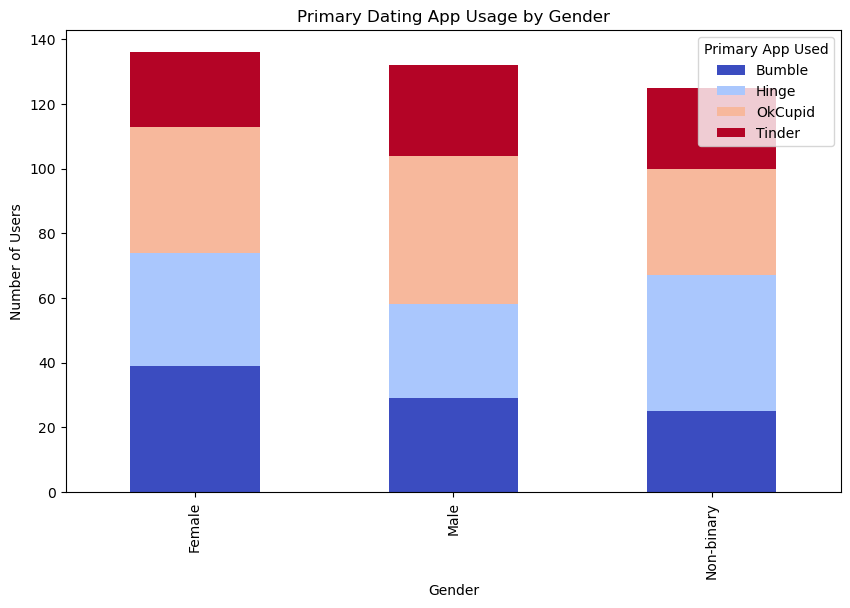

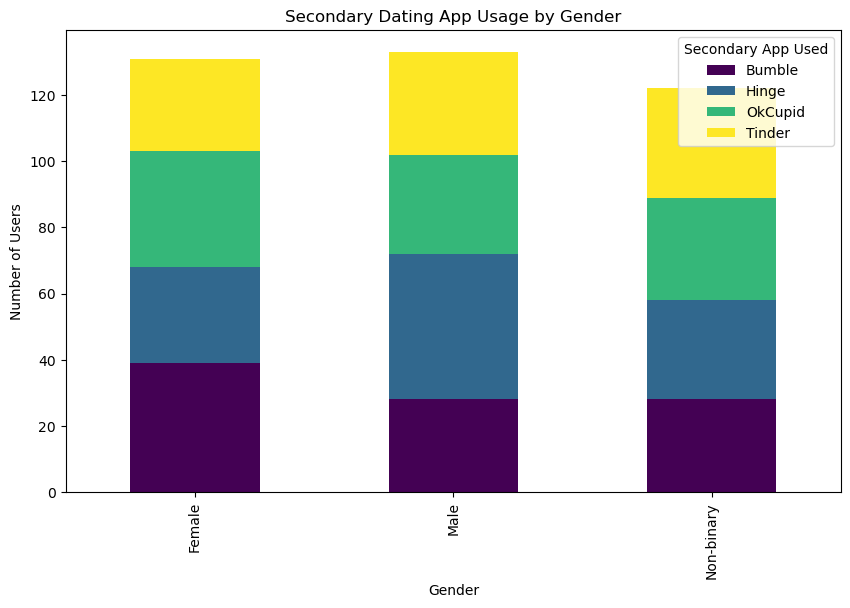

In [55]:
# Does gender influence dating app preferences?
# here is working code
import pandas as pd
import matplotlib.pyplot as plt

# Count users by Gender and Primary App Usage
gender_primary_usage = pd.crosstab(data["Gender"], data["Primary_App"])

# Handling Secondary Apps: Split and count each app separately
secondary_expanded = data.assign(Secondary_Apps=data["Secondary_Apps"].str.split(", ")).explode("Secondary_Apps")
gender_secondary_usage = pd.crosstab(secondary_expanded["Gender"], secondary_expanded["Secondary_Apps"])

# Plot stacked bar chart for Primary App Usage
gender_primary_usage.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
plt.title("Primary Dating App Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.legend(title="Primary App Used")
plt.show()

# Plot stacked bar chart for Secondary App Usage
gender_secondary_usage.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Secondary Dating App Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.legend(title="Secondary App Used")
plt.show()


In [56]:
print(data.dtypes)


User_ID                       int64
Age                           int64
Gender                       object
Location                     object
Education                    object
Occupation                   object
Primary_App                  object
Secondary_Apps               object
Usage_Frequency              object
Daily_Usage_Time            float64
Reason_for_Using             object
Satisfaction                  int64
Challenges                   object
Desired_Features             object
Preferred_Communication      object
Partner_Priorities           object
Age_Group                  category
dtype: object


In [57]:
#print(data["Usage_Frequency"].unique())
#print(data["Daily_Usage_Time"].unique())


In [58]:
#mapping = {
  #  "Daily": 7,   # Assuming 'Daily' means 7 times a week
    #"Weekly": 1,  # Assuming 'Weekly' means once a week
    #"Monthly": 0.25  # Assuming 'Monthly' means roughly once every 4 weeks
#}
#data["Usage_Frequency"] = data["Usage_Frequency"].map(mapping)



In [59]:
# Pivot Tables & Groupby Aggregations
import pandas as pd

# Load dataset
data = pd.read_csv("GenZ_DatingApp_Data.csv")

# Standardize column names (strip spaces, ensure uniform format)
data.columns = data.columns.str.strip()

# Debug column names
print("Column Names:", data.columns.tolist())

# Aggregate user count by Gender and Age Group
gender_age_summary = data.groupby(["Gender", "Age"]).size().unstack(fill_value=0)

# Aggregate user count by Urban/Rural location
location_summary = data["Location"].value_counts()

# Display summaries
print("\nUser Distribution by Gender and Age:")
print(gender_age_summary)

print("\nUser Distribution by Urban vs. Rural:")
print(location_summary)

# Convert summaries to DataFrames for better visualization
gender_age_summary_df = gender_age_summary.astype(int)
location_summary_df = location_summary.to_frame(name="User Count")

# Convert categorical 'Usage_Frequency' to numeric scale
usage_mapping = {
    "Daily": 7,       # 7 times a week
    "Weekly": 1,      # 1 time a week
    "Monthly": 0.25   # ~1 time every 4 weeks
}

# Check if the columns exist before processing
if "Usage_Frequency" in data.columns and "Daily_Usage_Time" in data.columns:
    print("\nMissing values before conversion:\n", data[["Usage_Frequency", "Daily_Usage_Time"]].isna().sum())

    # Convert Usage_Frequency using mapping
    if data["Usage_Frequency"].dtype == object:
        data["Usage_Frequency"] = data["Usage_Frequency"].map(usage_mapping)

    # Convert Daily_Usage_Time to numeric
    data["Daily_Usage_Time"] = pd.to_numeric(data["Daily_Usage_Time"], errors="coerce")

    # Debug after conversion
    print("\nData Types after conversion:\n", data[["Usage_Frequency", "Daily_Usage_Time"]].dtypes)
    print("\nMissing values after conversion:\n", data[["Usage_Frequency", "Daily_Usage_Time"]].isna().sum())

    # Drop rows where both columns are NaN
    data.dropna(subset=["Usage_Frequency", "Daily_Usage_Time"], inplace=True)

    # Ensure valid data exists before pivoting
    if not data.empty:
        pivot_table = data.pivot_table(index="Age", columns="Gender",
                                       values=["Usage_Frequency", "Daily_Usage_Time"], aggfunc="mean")
        print("\nAverage Usage Frequency & Daily Usage Time by Age & Gender:")
        print(pivot_table)
    else:
        print("\nNo valid numeric data found for pivot table after cleaning.")
else:
    print("\nColumns 'Usage_Frequency' and 'Daily_Usage_Time' not found in dataset.")


Column Names: ['User_ID', 'Age', 'Gender', 'Location', 'Education', 'Occupation', 'Primary_App', 'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time', 'Reason_for_Using', 'Satisfaction', 'Challenges', 'Desired_Features', 'Preferred_Communication', 'Partner_Priorities']

User Distribution by Gender and Age:
Age         18  19  20  21  22  23  24  25
Gender                                    
Female      25  31  25  18  10  25  20  22
Male        20  19  11  23  25  25  32  16
Non-binary  12  17  15  20  28  23  22  16

User Distribution by Urban vs. Rural:
Location
Mumbai       82
Delhi        76
Kolkata      76
Bangalore    69
Pune         67
Chennai      66
Hyderabad    64
Name: count, dtype: int64

Missing values before conversion:
 Usage_Frequency     0
Daily_Usage_Time    0
dtype: int64

Data Types after conversion:
 Usage_Frequency     float64
Daily_Usage_Time    float64
dtype: object

Missing values after conversion:
 Usage_Frequency       0
Daily_Usage_Time    500
dtype: int6

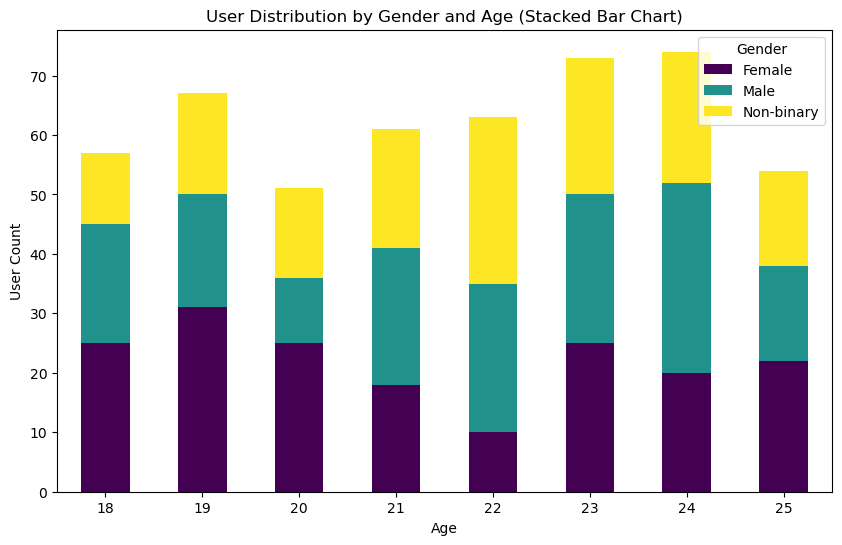

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("GenZ_DatingApp_Data.csv")

# Aggregate user count by Gender and Age Group
gender_age_summary = data.groupby(["Gender", "Age"]).size().unstack(fill_value=0)

# Plot Stacked Bar Chart
gender_age_summary.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Labels and title
plt.xlabel("Age")
plt.ylabel("User Count")
plt.title("User Distribution by Gender and Age (Stacked Bar Chart)")
plt.legend(title="Gender")
plt.xticks(rotation=0)

# Show plot
plt.show()


C:\Users\ME\AppData\Local\Temp\ipykernel_4448\3424138501.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_summary.index, y=location_summary.values, palette="coolwarm")


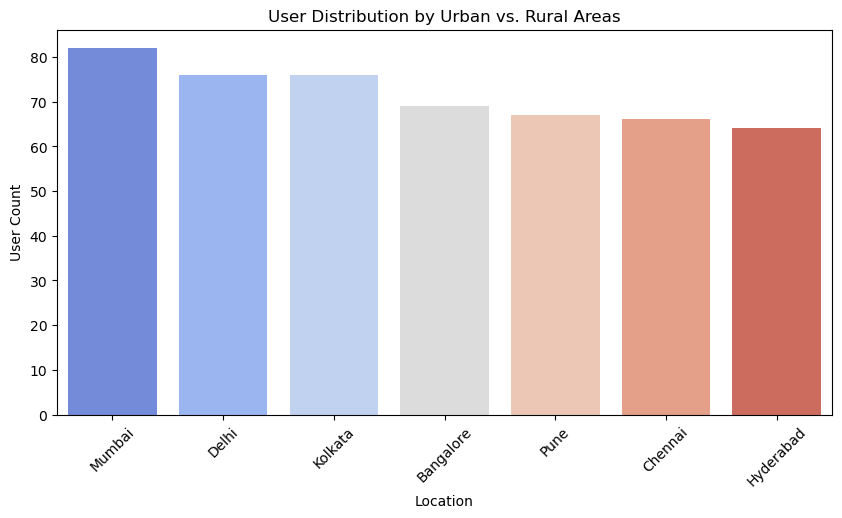

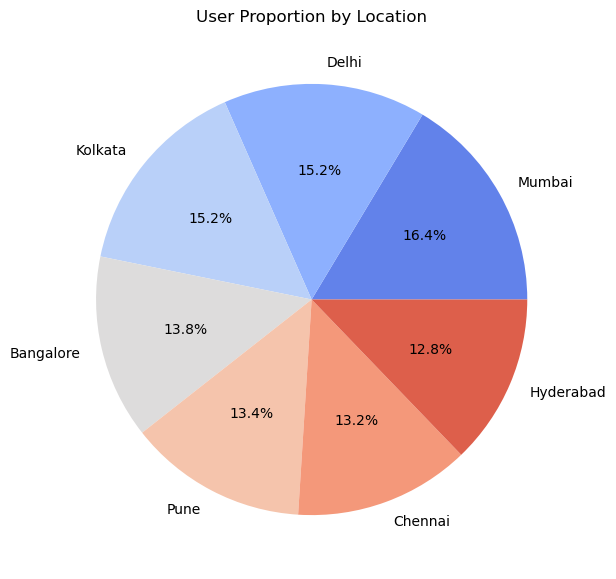

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("GenZ_DatingApp_Data.csv")

# Count users in each location
location_summary = data["Location"].value_counts()

# Bar Chart: User Distribution by Location
plt.figure(figsize=(10, 5))
sns.barplot(x=location_summary.index, y=location_summary.values, palette="coolwarm")

# Labels and title
plt.xlabel("Location")
plt.ylabel("User Count")
plt.title("User Distribution by Urban vs. Rural Areas")
plt.xticks(rotation=45)
plt.show()

# Pie Chart: Proportion of Users in Urban vs. Rural
plt.figure(figsize=(7, 7))
location_summary.plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(location_summary)))

# Title and format
plt.ylabel("")
plt.title("User Proportion by Location")
plt.show()


C:\Users\ME\AppData\Local\Temp\ipykernel_4448\3834172294.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Location", y="User Count", data=location_df, palette="coolwarm")


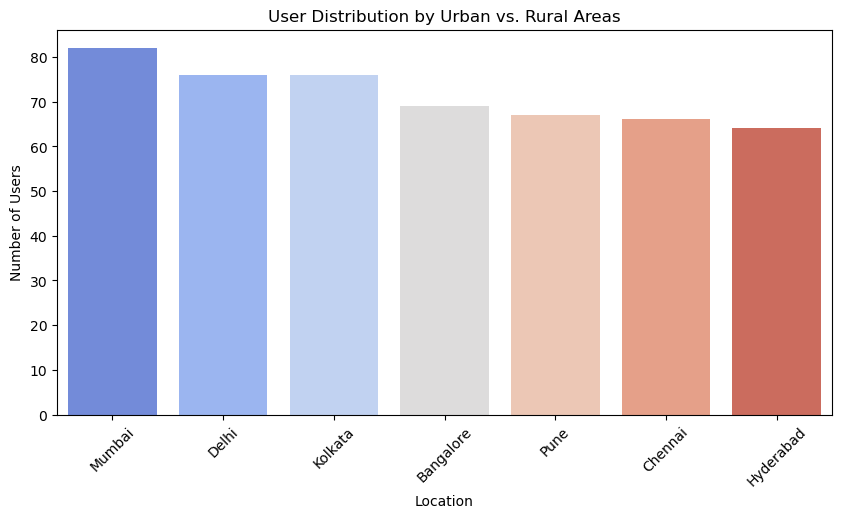

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("GenZ_DatingApp_Data.csv")

# Aggregate user count by Urban/Rural location
location_summary = data["Location"].value_counts()

# Convert location summary to DataFrame for visualization
location_df = location_summary.reset_index()
location_df.columns = ["Location", "User Count"]

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Location", y="User Count", data=location_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.title("User Distribution by Urban vs. Rural Areas")
plt.show()


C:\Users\ME\AppData\Local\Temp\ipykernel_4448\1499504666.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


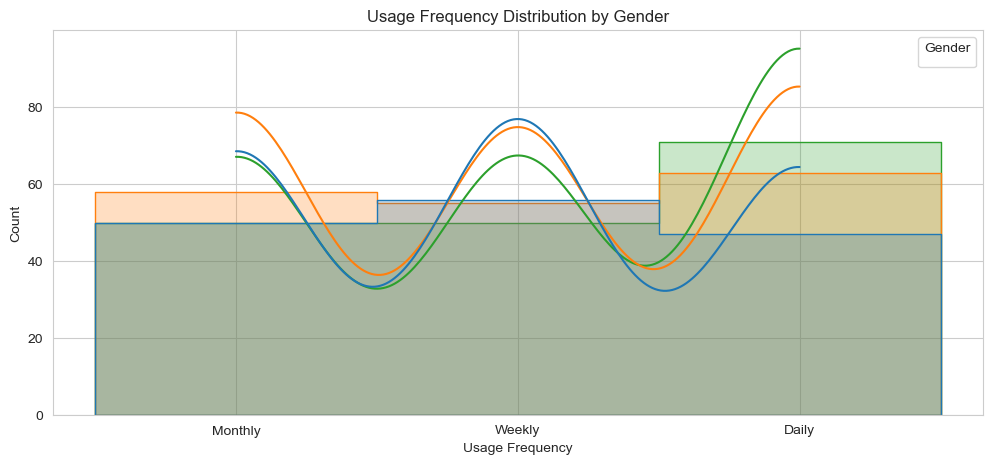

C:\Users\ME\AppData\Local\Temp\ipykernel_4448\1499504666.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


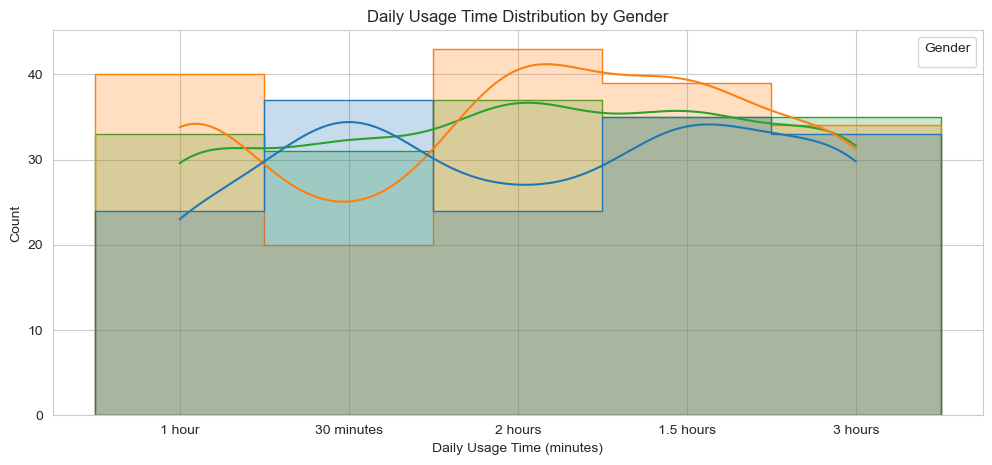

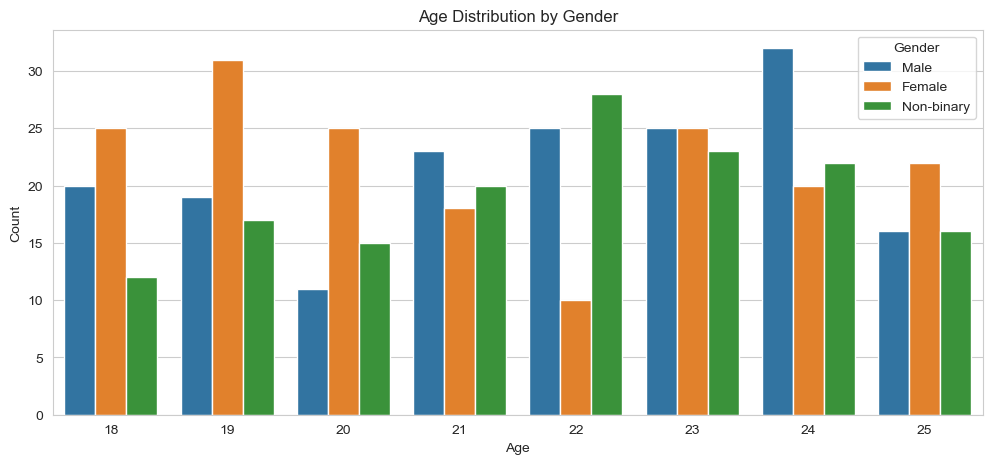

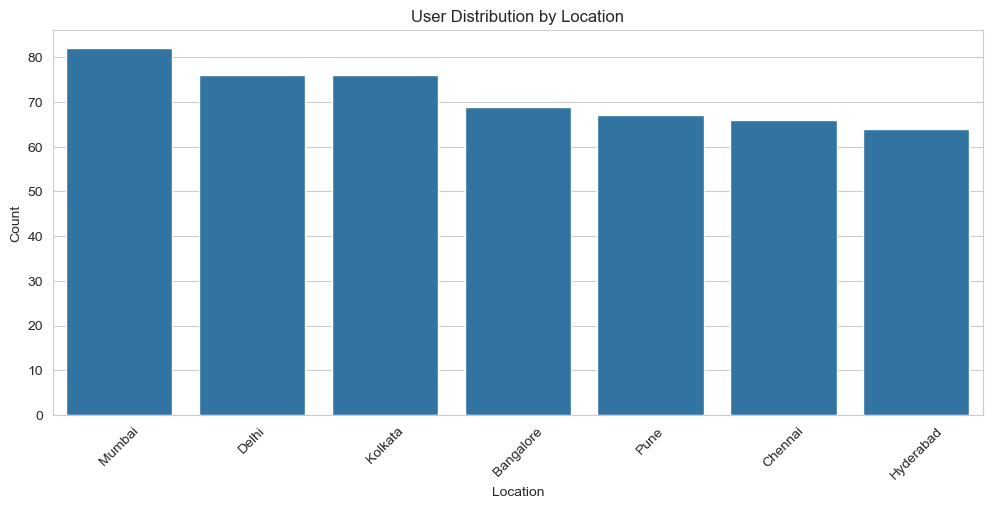

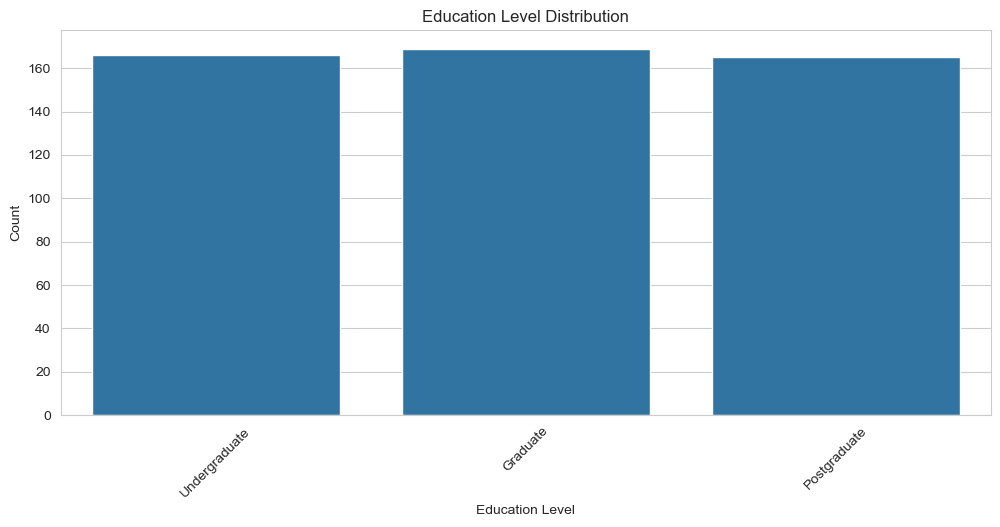

Missing Values per Column:
 Primary_App       107
Secondary_Apps    114
Challenges        117
dtype: int64


In [64]:
# task 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("GenZ_DatingApp_Data.csv")

# Set style for seaborn
sns.set_style("whitegrid")

# 1. Gender Bias in Usage (Histograms & KDE Plots)
plt.figure(figsize=(12, 5))
sns.histplot(data=data, x="Usage_Frequency", hue="Gender", element="step", kde=True, common_norm=False)
plt.title("Usage Frequency Distribution by Gender")
plt.xlabel("Usage Frequency")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x="Daily_Usage_Time", hue="Gender", element="step", kde=True, common_norm=False)
plt.title("Daily Usage Time Distribution by Gender")
plt.xlabel("Daily Usage Time (minutes)")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

# 2. Demographic Representation (Bar Charts)
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="Age", hue="Gender")
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="Location", order=data["Location"].value_counts().index)
plt.xticks(rotation=45)
plt.title("User Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="Education")
plt.xticks(rotation=45)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# 3. Identifying Missing Groups
missing_counts = data.isnull().sum()
print("Missing Values per Column:\n", missing_counts[missing_counts > 0])

# 4. Discussion on Bias & Trustworthiness
# - Look for skewed distributions in the plots.
# - Check if certain groups are missing or significantly underrepresented.
# - Discuss ethical considerations in data collection.

# GitHub Commit Message:
# git commit -m "Added bias detection analysis and demographic trends."
